Kelvin Tran s3781137
# Predicting height of basketball players data
The objective of this project is to determine the height of a professional basketball player
The report contents are:

- Overview:  Covers the features of the dataset and that goals of this project
- Data Preperation: How the dataset is refined and cleaned for examination
- Data Exploration: Features of the dataset indepth and their relationship
- Statistical Modeling and Performance Evaluation: Univariate and multivariate models, regression models and diagnostic checks for analysis. Next backwards regression variable are made using p-values to obtain a reduced model.

## Overview
### Data Source
Kaggle Respository provides a  dataset of basketball player stats from 1999-2020, from 49 international leagues. The dataset was uploaded by Jacob Baruch and has variables of interest. The dataset has 53798 instances of data and 30 independent features, as well as the target variable of height.

https://www.kaggle.com/jacobbaruch/basketball-players-stats-per-season-49-leagues
### Project Objective
The objective is this project is to analyse the height of basketball players through it's distribution, and it's relationship with the other variables. The distribution, variance and predictability of height can be further examined through the use of regression models and a reduced model. Furthermore a the predictability of height can be determined through r-square values and p-values.

### Descriptive Features
The descriptions of the variables in the dataset are:

Stage: Nominal/-/International, Playoffs, Regular_Season 
MIN: Continuous/minutes/total minutes played 
TOV: Continuous/-/total turnovers 
REB: Continuous/-/total rebounds 
AST: Continuous/-/total assists 
STL: Steals/-/total steals 
BLK: Blocks/-/total blocks 
PTS: Continuous/-/total points 
height_cm: Continuous/cm/height of player 
weight_kg:Continuous/kg/ weight of player

Necessary modules are imported

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import warnings
from IPython.display import display, HTML

warnings.filterwarnings('ignore')

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

In [2]:
playerData = pd.read_csv("players.csv")


playerData.sample(15, random_state=50)
    

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
21970,Israeli-BSL,2015 - 2016,International,Oded David Brandwein,NAH,36,634.0,71,192,37,...,233,1988.0,Feb,"Feb 15, 1988",06-Jan,185.0,182.0,83.0,Israel,NaN
6305,South-Korean-KBL,2019 - 2020,International,Sang Park Kyung,MOB,41,493.6,47,152,34,...,147,1990.0,May,"May 20, 1990",06-Feb,188.0,NaN,NaN,South Korea,NaN
4022,Greek-HEBA-A1,2019 - 2020,International,Zois Karampelas,PER,11,130.5,11,39,7,...,41,2001.0,Apr,"Apr 27, 2001",06-Jan,185.0,180.0,82.0,Greece,NaN
51112,Australian-NBL,2003 - 2004,International,John Thomas,GIE,23,805.8,118,269,37,...,426,1976.0,Oct,"Oct 11, 1976",05-Sep,175.0,NaN,NaN,NaN,NaN
18405,British-BBL,2016 - 2017,International,Brandon Boggs,BAF,35,1136.5,171,387,33,...,422,1992.0,Jul,"Jul 11, 1992",06-May,196.0,190.0,86.0,United States,J.L. Mann High School
4093,Hungarian-NBIA,2019 - 2020,International,Slaven Cupkovic,ALB,21,496.0,67,163,36,...,192,1988.0,Jun,"Jun 23, 1988",06-Sep,206.0,231.0,105.0,Bosnia and Herzegovina / Serbia,NaN
25256,South-Korean-KBL,2015 - 2016,International,Cuthbert Victor,MOB,57,1515.0,356,630,41,...,857,1983.0,Jan,"Jan 30, 1983",06-Jun,198.0,215.0,98.0,U.S. Virgin Islands / United States,St. Joseph High School
24324,Italian-Lega-Basket-Serie-A,2015 - 2016,International,Joe Ragland,AVE,30,855.0,138,292,52,...,399,1989.0,Nov,"Nov 11, 1989",6-0,183.0,185.0,84.0,United States,West Springfield High School
8258,Belarusian-BPL,2018 - 2019,International,Aliaksandr Kudrautsau,MIN,6,142.7,20,46,4,...,62,1980.0,May,"May 23, 1980",06-Feb,188.0,179.0,81.0,Belarus,NaN
23146,Danish-Basketligaen,2015 - 2016,International,Alonzo Brooks,STEV,31,876.4,156,362,6,...,407,1984.0,Sep,"Sep 3, 1984",06-Jul,201.0,220.0,100.0,United States,NaN


## Data Cleaning and Transformation

In [3]:
print(f"Shape of the dataset is {playerData.shape} \n")
print(f"Variable types are as follows (float64, object, int64) :")
print(playerData.dtypes)

Shape of the dataset is (53798, 31) 

Variable types are as follows (float64, object, int64) :
League          object
Season          object
Stage           object
Player          object
Team            object
GP               int64
MIN            float64
FGM              int64
FGA              int64
3PM              int64
3PA              int64
FTM              int64
FTA              int64
TOV              int64
PF               int64
ORB              int64
DRB              int64
REB              int64
AST              int64
STL              int64
BLK              int64
PTS              int64
birth_year     float64
birth_month     object
birth_date      object
height          object
height_cm      float64
weight         float64
weight_kg      float64
nationality     object
high_school     object
dtype: object


## Checking for missing values
As there are many missing values, they will have to be removed in order to be able to calculate the reduced model.

In [4]:
print(f"\nNumber of missing values for each feature:")
print(playerData.isnull().sum())
playerData.dropna(inplace=True)


Number of missing values for each feature:
League             0
Season             0
Stage              0
Player             0
Team              11
GP                 0
MIN                0
FGM                0
FGA                0
3PM                0
3PA                0
FTM                0
FTA                0
TOV                0
PF                 0
ORB                0
DRB                0
REB                0
AST                0
STL                0
BLK                0
PTS                0
birth_year       319
birth_month      319
birth_date       319
height            74
height_cm         74
weight          4566
weight_kg       4566
nationality        7
high_school    30247
dtype: int64


## Summary Statistics

In [5]:
display(HTML('<b>Table 1: Summary of continuous features</b>'))
playerData.describe(include='int64')

,GP,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
count,23414.000000,23414.000000,23414.000000,23414.000000,23414.000000,23414.000000,23414.000000,23414.000000,23414.000000,23414.000000,23414.000000,23414.000000,23414.000000,23414.000000,23414.000000,23414.000000
mean,33.744811,146.378705,312.985564,32.584138,90.657214,73.330315,98.140600,56.129538,78.587939,43.046041,115.490817,158.536858,78.210814,31.968907,14.961647,398.675237
std,21.962088,125.027888,267.749183,37.086861,97.422899,75.060350,96.120727,45.723044,54.904386,45.718052,104.775780,145.276753,93.096604,26.642343,23.279379,339.604259
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,60.000000,131.000000,4.000000,15.000000,26.000000,35.000000,24.000000,37.000000,13.000000,44.000000,59.000000,23.000000,13.000000,2.000000,166.000000
50%,31.000000,117.000000,251.000000,21.000000,63.000000,53.000000,73.000000,46.000000,69.000000,28.000000,87.000000,118.000000,49.000000,25.000000,7.000000,323.000000
75%,41.000000,187.000000,395.000000,48.000000,134.750000,94.000000,126.000000,74.000000,102.000000,58.000000,151.000000,208.000000,97.000000,44.000000,18.000000,510.000000
max,85.000000,978.000000,2173.000000,402.000000,1028.000000,756.000000,972.000000,464.000000,371.000000,440.000000,894.000000,1247.000000,925.000000,225.000000,307.000000,2832.000000


In [6]:
display(HTML('<b>Table 2: Summary of nominal features</b>'))
playerData.describe(include='object')

,League,Season,Stage,Player,Team,birth_month,birth_date,height,nationality,high_school
count,23414,23414,23414,23414,23414,23414,23414,23414,23414,23414
unique,50,21,3,5776,723,12,4145,27,254,3041
top,NBA,2019 - 2020,International,Ricky Paulding,SAS,Jul,"Jun 26, 1984",06-Aug,United States,Oak Hill Academy
freq,6659,2533,16755,35,380,2113,49,2865,18314,261


## Cleaning up columns

All categorical features besides height_cm, weight_kg and stage are not relevent as they do not have predictive power and because there are just too many variables that aren't as much of a priority so they will be dropped. Height will be dropped as well as it is a duplicate of height_cm. Also GP, FGM, FGA, 3PM, FTM, FTA, PF, ORB and  DRB will be dropped as there are just too many variables.

In [7]:
playerData = playerData.drop(columns=['League'])
playerData = playerData.drop(columns=['Season'])
playerData = playerData.drop(columns=['Player'])
playerData = playerData.drop(columns=['Team'])
playerData = playerData.drop(columns=['GP'])
playerData = playerData.drop(columns=['FGM'])
playerData = playerData.drop(columns=['FGA'])
playerData = playerData.drop(columns=['3PM'])
playerData = playerData.drop(columns=['3PA'])
playerData = playerData.drop(columns=['FTM'])
playerData = playerData.drop(columns=['FTA'])
playerData = playerData.drop(columns=['PF'])
playerData = playerData.drop(columns=['ORB'])
playerData = playerData.drop(columns=['DRB'])
playerData = playerData.drop(columns=['birth_year'])
playerData = playerData.drop(columns=['birth_month'])
playerData = playerData.drop(columns=['birth_date'])
playerData = playerData.drop(columns=['height'])
playerData = playerData.drop(columns=['weight'])
playerData = playerData.drop(columns=['nationality'])
playerData = playerData.drop(columns=['high_school'])
playerData = playerData.drop(columns=['weight_kg'])
playerData['height_cm'].describe()

count    23414.000000
mean       197.906295
std          8.792828
min        160.000000
25%        191.000000
50%        198.000000
75%        203.000000
max        229.000000
Name: height_cm, dtype: float64

## Data Exploration

### Univariate Data

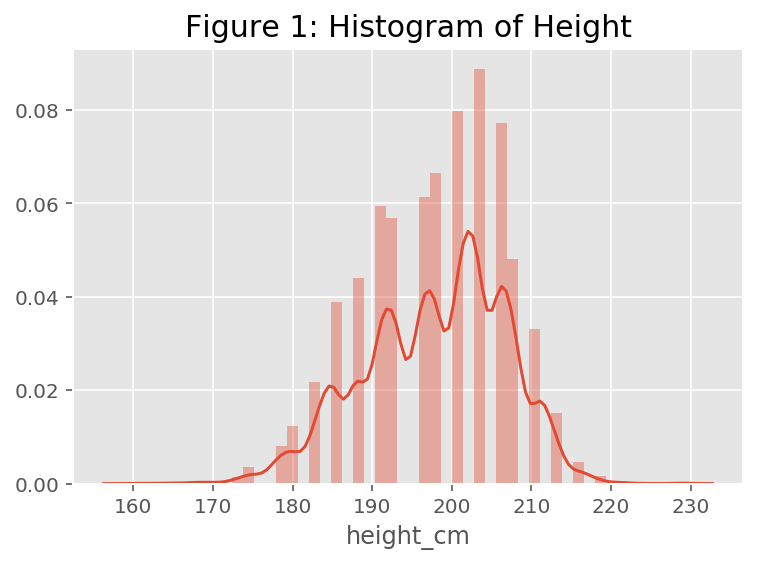

In [8]:
sns.distplot(playerData['height_cm'], kde = True).set_title('Figure 1: Histogram of Height', fontsize = 15)
plt.show();

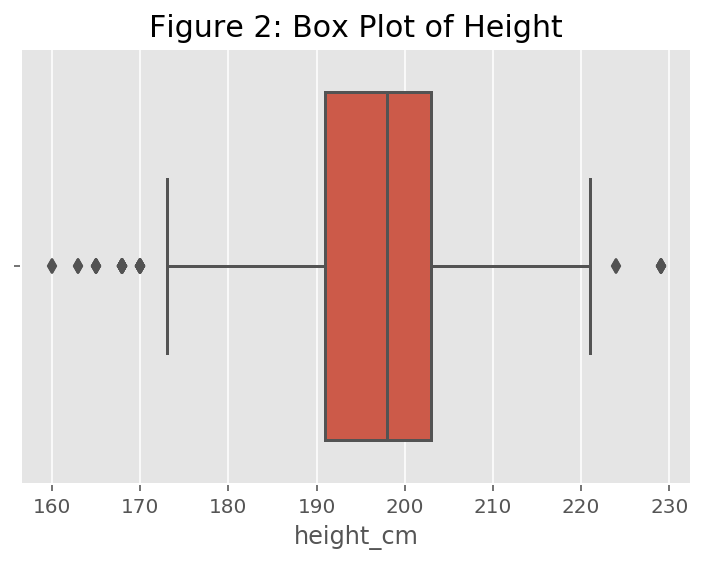

In [9]:
sns.boxplot(playerData['height_cm']).set_title('Figure 2: Box Plot of Height', fontsize = 15)
plt.show();

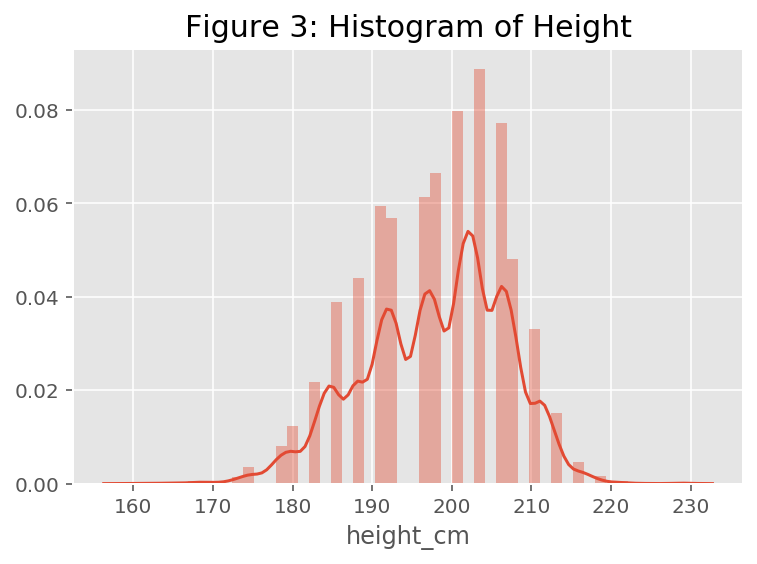

In [10]:
sns.distplot(playerData['height_cm'], kde = True).set_title('Figure 3: Histogram of Height', fontsize = 15)
plt.show();

## Multivariate Visualisation

### Scatterplot of numeric functions with height
The relationship between height and points seems to be normally distributed with a slight positive, having a unimodal shape around the median height.

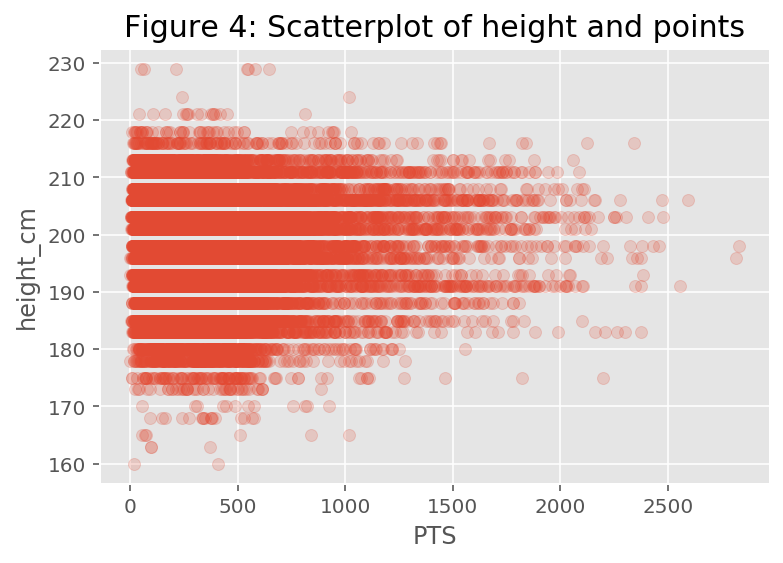

In [11]:
hpw = playerData['PTS']

plt.scatter(hpw, playerData['height_cm'], alpha = 0.2)
plt.title('Figure 4: Scatterplot of height and points', fontsize = 15)
plt.xlabel('PTS')
plt.ylabel('height_cm')
plt.show();

The relationship between height and steals seems to be normally distributed, having a unimodal shape around the median height as shown in figure 5

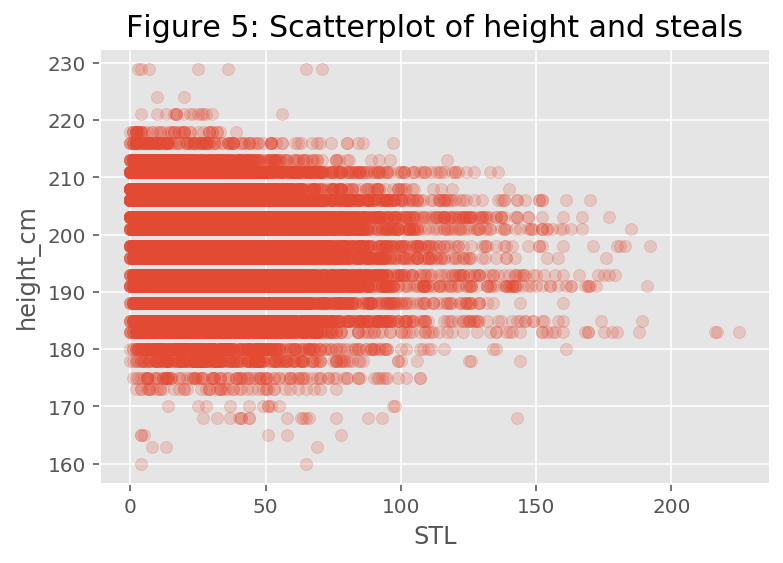

In [12]:
hpw = playerData['STL']

plt.scatter(hpw, playerData['height_cm'], alpha = 0.2)
plt.title('Figure 5: Scatterplot of height and steals', fontsize = 15)
plt.xlabel('STL')
plt.ylabel('height_cm')
plt.show();

The relationship between height and blocks and height and rebounds has a very strong positive correlation as shown in figures 6 and 7.

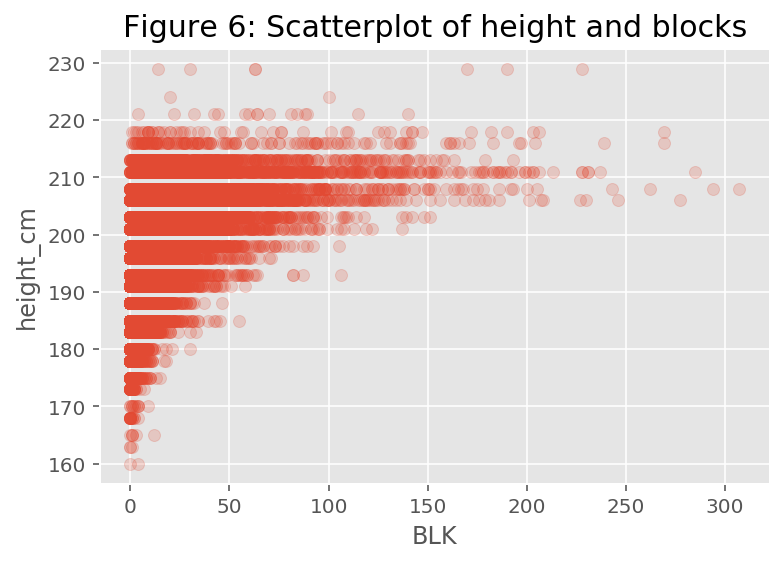

In [13]:
hpw = playerData['BLK']

plt.scatter(hpw, playerData['height_cm'], alpha = 0.2)
plt.title('Figure 6: Scatterplot of height and blocks', fontsize = 15)
plt.xlabel('BLK')
plt.ylabel('height_cm')
plt.show();

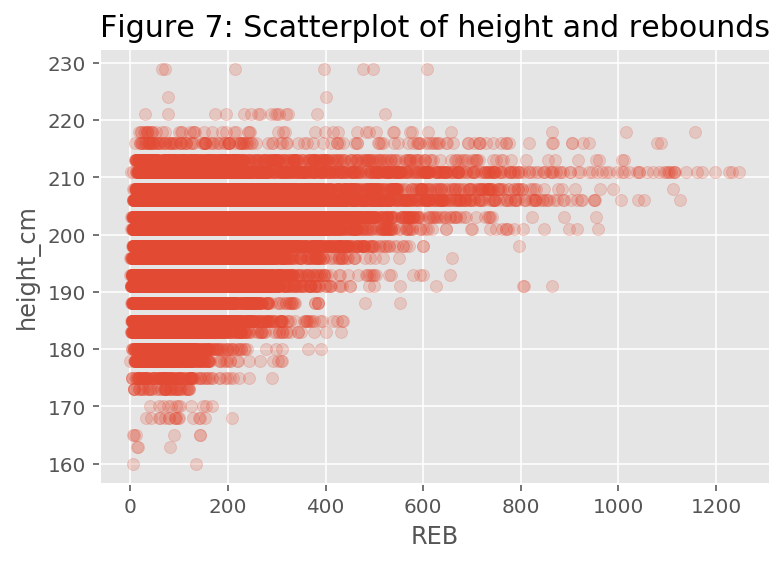

In [14]:
hpw = playerData['REB']

plt.scatter(hpw, playerData['height_cm'], alpha = 0.2)
plt.title('Figure 7: Scatterplot of height and rebounds', fontsize = 15)
plt.xlabel('REB')
plt.ylabel('height_cm')
plt.show();

The relationship between height and turnovers is normally distributed.

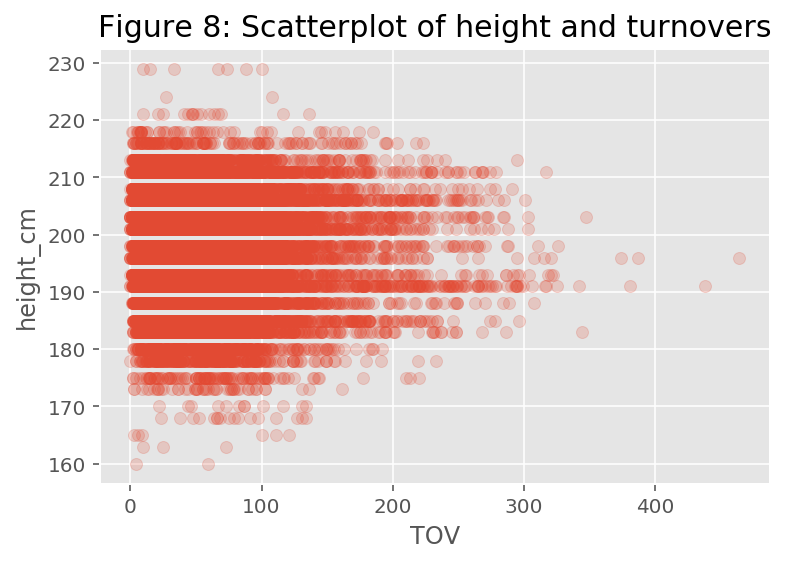

In [15]:
hpw = playerData['TOV']

plt.scatter(hpw, playerData['height_cm'], alpha = 0.2)
plt.title('Figure 8: Scatterplot of height and turnovers', fontsize = 15)
plt.xlabel('TOV')
plt.ylabel('height_cm')
plt.show();

The relationship between height and minutes has a slight positive correlation, which dips significantly at 220 cm.

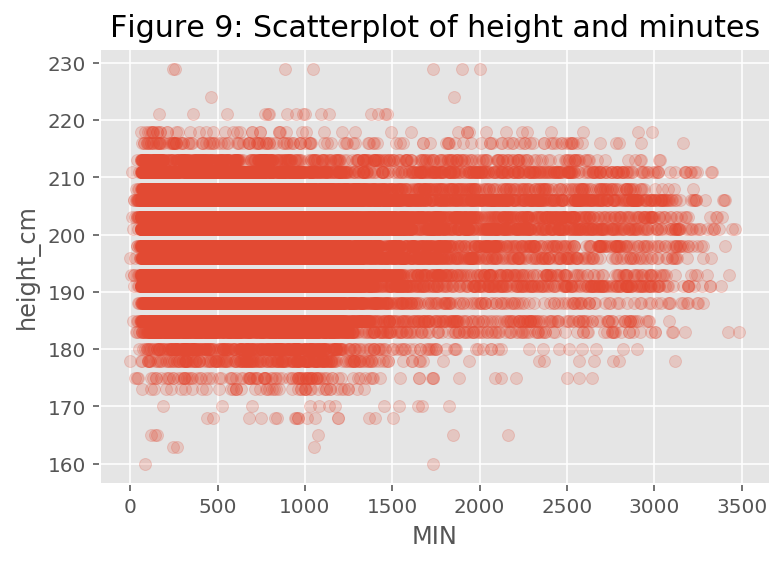

In [16]:
hpw = playerData['MIN']

plt.scatter(hpw, playerData['height_cm'], alpha = 0.2)
plt.title('Figure 9: Scatterplot of height and minutes', fontsize = 15)
plt.xlabel('MIN')
plt.ylabel('height_cm')
plt.show();

## Categorical functions with height

The NBA regular season has a higher average median than international leagues. The NBA playoffs has  a similar average, but slightly larger quartile groups.

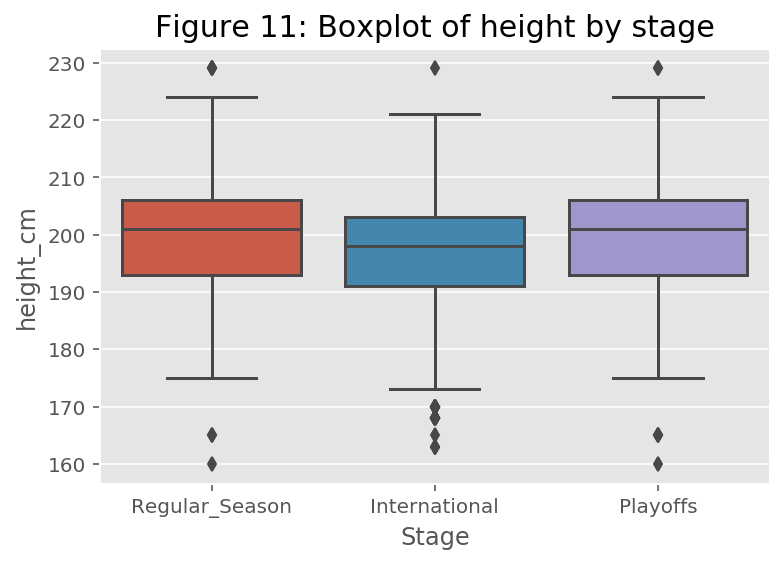

In [17]:
sns.boxplot(playerData['Stage'], playerData['height_cm']);
plt.title('Figure 11: Boxplot of height by stage', fontsize = 15)
plt.show();

## Facet plots

It is shown in figure 12 that points increases proportionally to the increase of height until around 200 cm, where it decreases significantly thereafter. It is also shown that players with high points usually have a higher total count of steals, and that players with heights further away from the median have less steals.

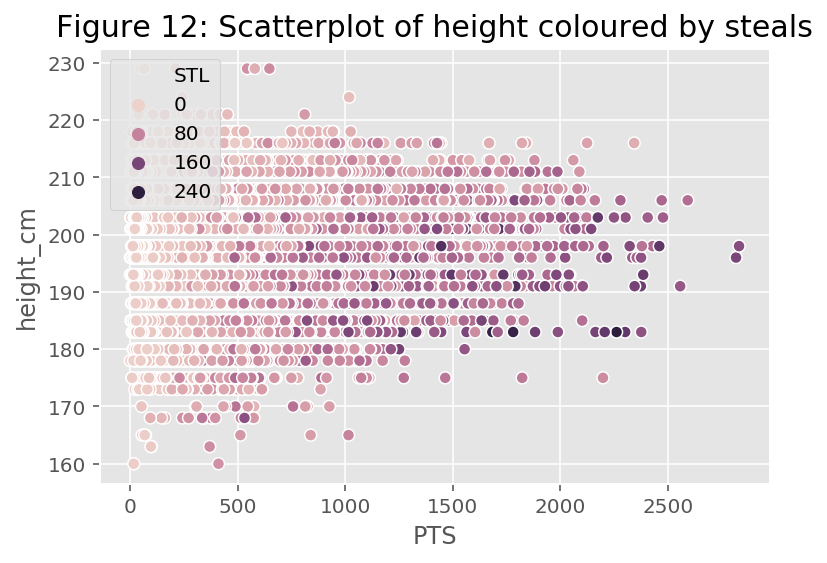

In [18]:
stage_mask = playerData['Stage'].isin(['Regular_Season','International', 'Playoffs'])

sx = playerData[stage_mask]

sns.scatterplot(sx['PTS'], sx['height_cm'], hue = sx['STL'])
plt.title('Figure 12: Scatterplot of height coloured by steals', fontsize = 15);
plt.legend(loc = 'upper left')
plt.show();

As shown in figure 13, rebounds proportionally increase as height increases. However turnovers seem to not be too closely linked to rebounds as high rebounds shown from 200cm to 220cm have lower turnovers than from 190cm to 200cm.

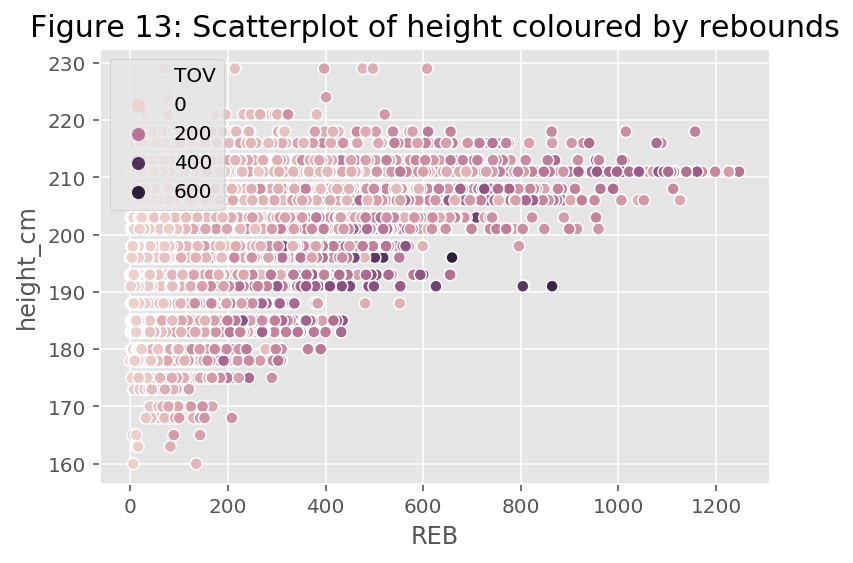

In [19]:
stage_mask = playerData['Stage'].isin(['Regular_Season','International', 'Playoffs'])

sx = playerData[stage_mask]

sns.scatterplot(sx['REB'], sx['height_cm'], hue = sx['TOV'])
plt.title('Figure 13: Scatterplot of height coloured by rebounds', fontsize = 15);
plt.legend(loc = 'upper left')
plt.show();

## Statistic Modeling and Performance Evaluation

### Full Model

The full model will be calculated first, but before that the data must be prepared beforehand.

In [20]:
playerData.head()

,Stage,MIN,TOV,REB,AST,STL,BLK,PTS,height_cm
0,Regular_Season,2482.6,308,446,512,125,60,2335,196.0
1,Regular_Season,2473.7,194,284,530,70,22,1978,191.0
2,Regular_Season,2511.8,264,297,456,49,18,1863,198.0
4,Regular_Season,2120.1,289,255,560,65,8,1778,188.0
6,Regular_Season,2053.2,194,242,347,71,23,1742,191.0


In [21]:
playerData.columns = [colname.replace(' ', '_') for colname in list(playerData.columns)]

In [22]:
formula_string_indep_vars = ' + '.join(playerData.drop(columns='height_cm').columns)
formula_string = 'height_cm ~ ' + formula_string_indep_vars
print('formula_string: ', formula_string)

formula_string:  height_cm ~ Stage + MIN + TOV + REB + AST + STL + BLK + PTS


In [23]:
playerData_encoded = pd.get_dummies(playerData, drop_first=True)
playerData_encoded.head()

,MIN,TOV,REB,AST,STL,BLK,PTS,height_cm,Stage_Playoffs,Stage_Regular_Season
0,2482.6,308,446,512,125,60,2335,196.0,0,1
1,2473.7,194,284,530,70,22,1978,191.0,0,1
2,2511.8,264,297,456,49,18,1863,198.0,0,1
4,2120.1,289,255,560,65,8,1778,188.0,0,1
6,2053.2,194,242,347,71,23,1742,191.0,0,1


In [24]:
formula_string_indep_vars_encoded = ' + '.join(playerData_encoded.drop(columns='height_cm').columns)
formula_string_encoded = 'height_cm ~ ' + formula_string_indep_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  height_cm ~ MIN + TOV + REB + AST + STL + BLK + PTS + Stage_Playoffs + Stage_Regular_Season


In [25]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=playerData_encoded)

model_full_fitted = model_full.fit()

print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:              height_cm   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     2057.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:59:25   Log-Likelihood:                -77302.
No. Observations:               23414   AIC:                         1.546e+05
Df Residuals:                   23404   BIC:                         1.547e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              197.4520 

In [26]:
residuals_full = pd.DataFrame({'actual': playerData_encoded['height_cm'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,196.0,190.861579,5.138421
1,191.0,185.534911,5.465089
2,198.0,189.865533,8.134467
4,188.0,184.236470,3.763530
6,191.0,191.158931,-0.158931
7,203.0,189.226648,13.773352
8,191.0,193.552047,-2.552047
9,208.0,212.861026,-4.861026
10,191.0,194.705138,-3.705138
11,191.0,194.736729,-3.736729


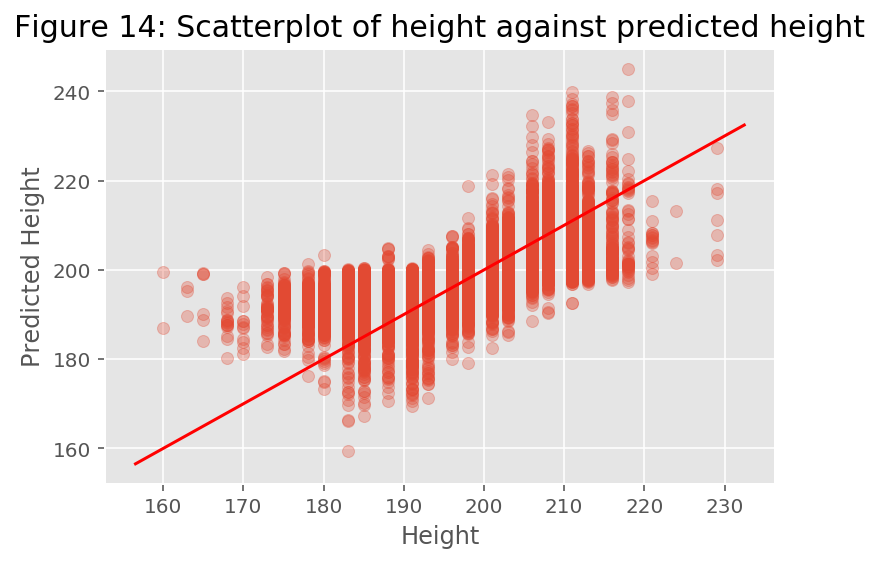

In [27]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
plt.scatter(playerData_encoded['height_cm'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Height');
plt.ylabel('Predicted Height');
plt.title('Figure 14: Scatterplot of height against predicted height', fontsize=15);
plt.show();

# Full Model Diagnostic Checks

As shown in figure 15, the residuals are situated around 0 from 180cm to 220 cm.

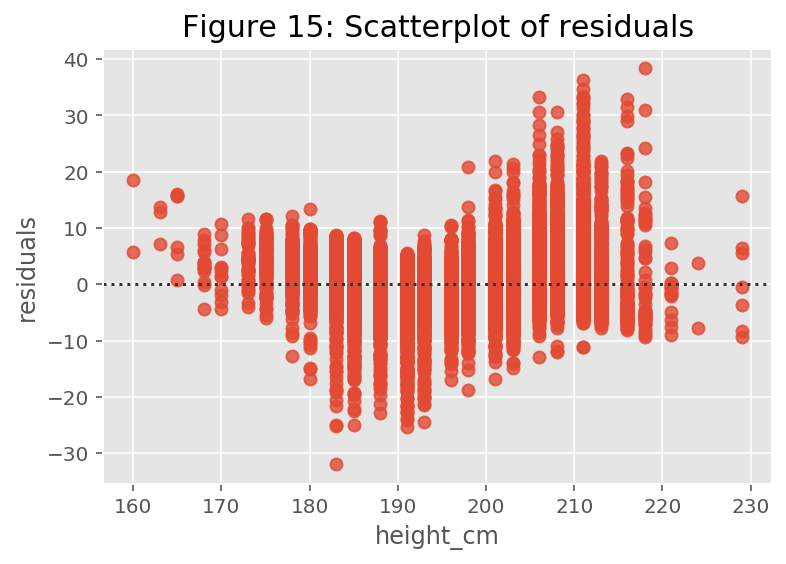

In [28]:
sns.residplot(x=playerData_encoded['height_cm'], y=residuals_full['predicted']);
plt.ylabel('residuals')
plt.title('Figure 15: Scatterplot of residuals', fontsize=15)
plt.show();

As shown in figure 16, the histogram of resiuals shows that residuals follows a mostly normal and symmetrical distribution.

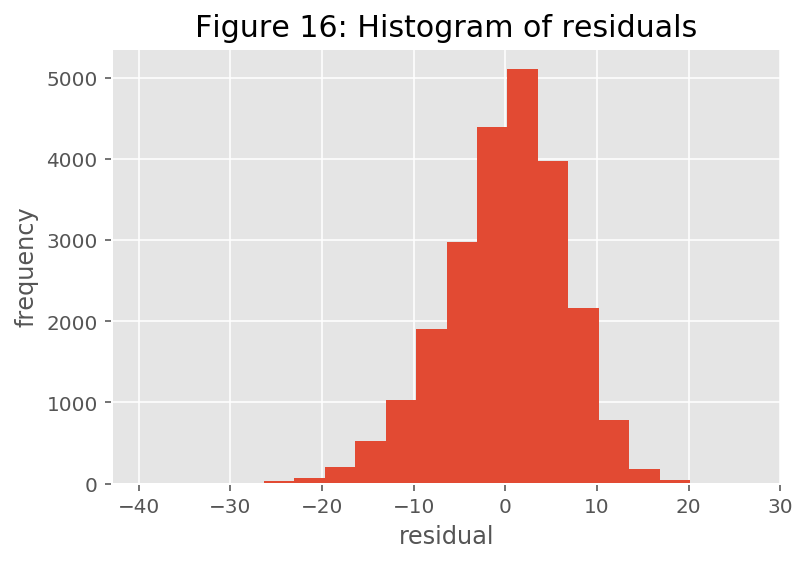

In [29]:
residuals = playerData_encoded['height_cm'] - model_full_fitted.fittedvalues
plt.hist(residuals, bins = 20);
plt.xlabel('residual');
plt.ylabel('frequency');
plt.title('Figure 16: Histogram of residuals', fontsize=15);
plt.show();

## Backwards Feature Selection

In [30]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=playerData_encoded).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = playerData_encoded).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "TOV" with p-value 0.09704

***
                            OLS Regression Results                            
Dep. Variable:              height_cm   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     2313.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:59:27   Log-Likelihood:                -77303.
No. Observations:               23414   AIC:                         1.546e+05
Df Residuals:                   23405   BIC:                         1.547e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------

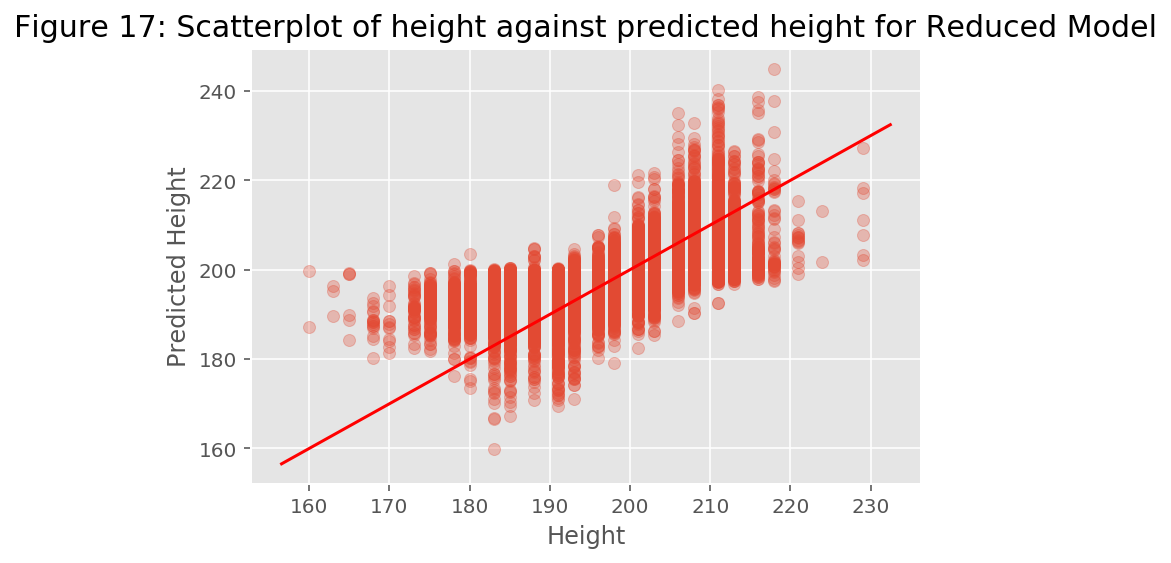

In [31]:
plt.scatter(playerData['height_cm'], model_reduced_fitted.fittedvalues, alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Height');
plt.ylabel('Predicted Height');
plt.title('Figure 17: Scatterplot of height against predicted height for Reduced Model', fontsize=15);
plt.show(); 

The reduced model shows an adjusted r-square value of 0.6881 which leads to a 70% variance. It is shown that heights under 180 are overestimated and heigths over 220 are underestimated.

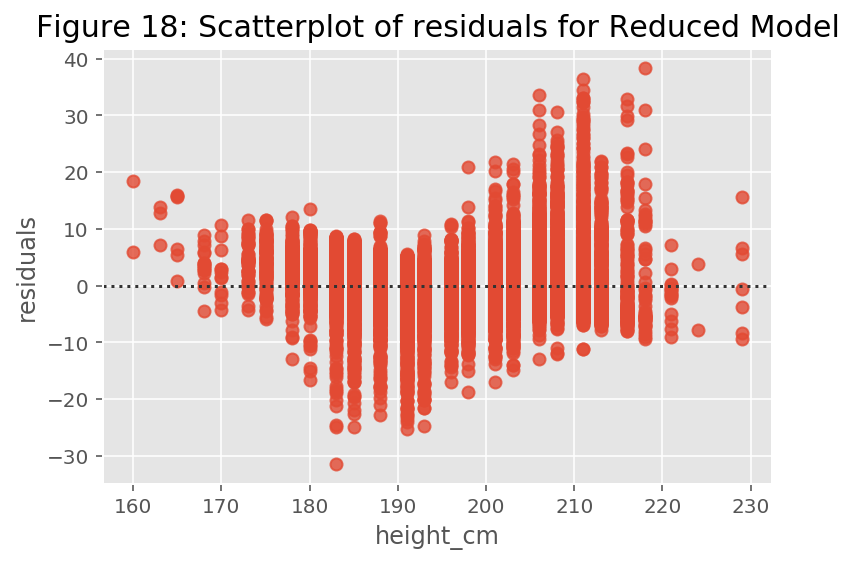

In [32]:
sns.residplot(x=playerData['height_cm'], y=model_reduced_fitted.fittedvalues)
plt.ylabel('residuals')
plt.title('Figure 18: Scatterplot of residuals for Reduced Model', fontsize=15)
plt.show();

In figure 18, the residuals is mostly normally distributed for heights ranging 180cm to 220cm.

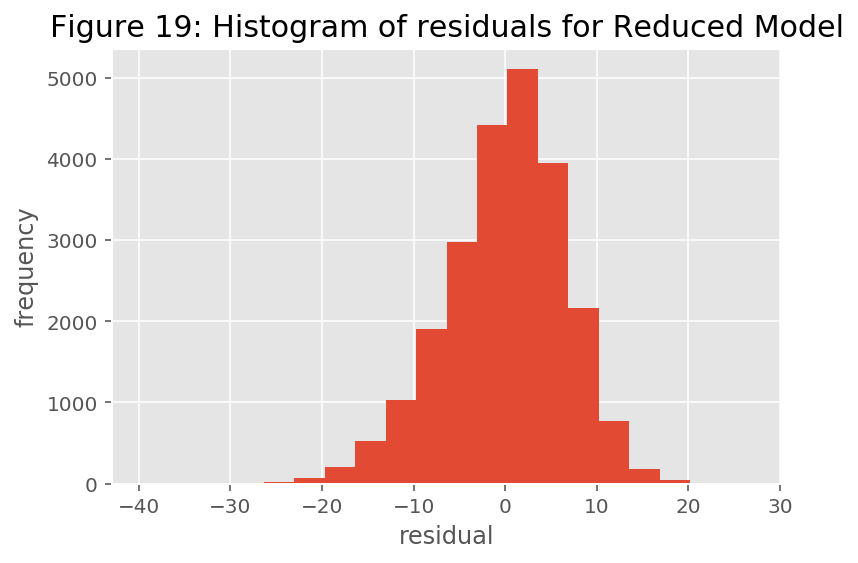

In [33]:
residuals2 = playerData_encoded['height_cm'] - model_reduced_fitted.fittedvalues
plt.hist(residuals2, bins = 20);
plt.xlabel('residual');
plt.ylabel('frequency');
plt.title('Figure 19: Histogram of residuals for Reduced Model', fontsize = 15)
plt.show();

Similar to the others, the histogram shown in figure 15 shows a normal distribution of residuals around 0.

## Summary and Conclusions

After indepth analysis of the 7 variables, we can see that height has it's most significant impact on rebounds and blocks as they are very positively proportional. The other variables show that heights ranging around the median of 190 have the highest of the other variables, minutes, steals, points and assists. It is also shown that heights typically higher in the NBA compared to other international leagues, indicating that NBA is more selective with the player's heights. As for the adjusted r-squared value, the indicator of 70% suggests a 70% variance.

## References

Jacob Baruch (2020). Kaggle
https://www.kaggle.com/jacobbaruch/basketball-players-stats-per-season-49-leagues